In [2]:
import ArxSR
import matplotlib.pyplot as plt
from astropy.io import fits  # For handling FITS files
import reduct
import os
import sys
import shutil
from scipy.signal import find_peaks
import numpy as np 
import scipy  

from scipy import signal 
from scipy.optimize import curve_fit, least_squares, leastsq, fsolve  
from scipy.interpolate import interp1d  
from scipy.ndimage import label 
import math  
import statistics  

# Data handling and analysis
import pandas as pd  # For data manipulation and analysis
from collections import Counter  # For counting hashable objects
from scipy import stats  # For statistical functions
from scipy.signal import chirp, find_peaks, peak_widths
# Image processing and computer vision
import cv2  # For computer vision tasks
from PIL import Image  # For image manipulation
from skimage import io, color, measure  # For image I/O and processing
from skimage.transform import hough_circle, hough_circle_peaks  # For Hough circle transforms
from skimage.feature import canny  # For edge detection
from skimage.draw import circle_perimeter  # For drawing circle perimeters
from skimage.util import img_as_ubyte  # For image type conversion

# Plotting and visualization
import matplotlib.pyplot as plt  # For plotting and visualization

# Machine learning
from sklearn.linear_model import RANSACRegressor, LinearRegression  # For regression analysis
from sklearn.pipeline import make_pipeline  # For making pipelines
from sklearn.preprocessing import PolynomialFeatures  # For generating polynomial features
from sklearn.metrics import mean_squared_error  # For calculating mean squared error

# Astronomy specific packages
import astropy  # For astronomy specific tasks
from astropy.io import fits  # For handling FITS files
from astropy.time import Time  # For handling time objects
from astropy.coordinates import SkyCoord  # For celestial coordinate system conversions
import astropy.units as u  # For unit conversions
# our func
import reduct
# Polynomial operations
from numpy.polynomial.polynomial import polyder  # For polynomial differentiation
from numpy.polynomial import Polynomial  # For polynomial operations
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter
from numpy.polynomial.polynomial import Polynomial



In [3]:
path = '../../Dropbox/QC2Python_spectrums/NGC3516_TO_ALIGN/crop-rot/NGC3516_24-25.03.1990_10m_LI-3-17-crop.fits'

In [17]:
ls ../../Dropbox/QC2Python_spectrums/NGC3516_TO_ALIGN/crop-rot/

Calibrovka_24-25.03.1990_1.5m_LII-1-cal-1-crop.fits
Calibrovka_24-25.03.1990_10s_LII-1-cal-1-crop.fits
Calibrovka_24-25.03.1990_30s_LII-1-cal-1-crop.fits
Calibrovka_24-25.03.1990_3m_LII-1-cal-1-crop.fits
Calibrovka_24-25.03.1990_40s_LII-1-cal-1-crop.fits
Calibrovka_24-25.03.1990_5s_LII-1-cal-1-crop.fits
Calibrovka_24-25.03.1990_6m_LII-1-cal-1-crop.fits
NGC3516_24-25.03.1990_10m_LI-3-17-crop.fits


In [ ]:
import numpy as np

# Примерные полиномы после калибровки
best_poly = np.poly1d([
    3.44e-20, -3.00e-16, 1.11e-12, -2.24e-9,
    2.74e-6, -2.06e-3, 0.93, -230.37, 23923.75
])

extra_poly = np.poly1d([
    2.44e-15, -1.46e-16, 1.63e-3, -7.32e-5, 1.90e-6,
    -3.47e-8, 4.76e-10, -5.14e-12, 4.46e-14, -3.15e-16,
    1.83e-18, -8.77e-21, 3.45e-23, -1.12e-25, 2.93e-28,
    -6.15e-31, 1.01e-33, -1.25e-36, 1.10e-39, -6.09e-43,
    1.61e-46
])

root = 415.6

# Создаём обработчик
handler = ArxSR.CsvPolynom(
    
    date='05.02.1976',                    # <- автоматически будет извлечена
    bestPoly=best_poly,
    extraPoly=extra_poly,
    root=root,
    Id=None,
    note="DDDDDDD"
)

handler.save()

Calibrovka_04-05.02.1976_10s_XVI-6-Cal-crop-header


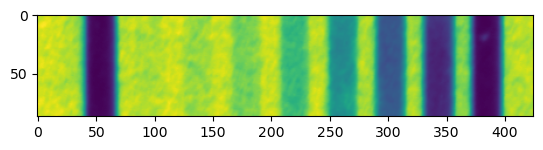

In [4]:
arx_data = ArxSR.ArxData("Calibrovka_04-05.02.1976_10s_XVI-6-Cal-crop-header.fits")

plt.imshow(arx_data.get_data())

cal_editor = ArxSR.ArxCollibEditor(arx_data)
result = cal_editor.get_peaks_auto()


# ArxSR.ArxData.get_data(path)

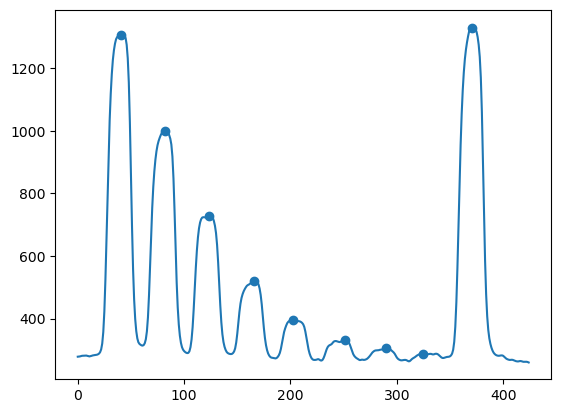

In [21]:
data= arx_data.get_data().mean(axis=0)[::-1]
plt.plot(np.log10(65535 / np.where(data == 0, 1e-32, data)) * 1000)
plt.scatter(result[0],result[1])

In [ ]:
CLIB

In [4]:
path_cal = '../../Dropbox/QC2Python_spectrums/caliobscperts/20241104_for_methods/19811002/cropped_rotated/'

In [ ]:
fits_cal_1  = fits.open(path_cal+ 'Calibrovka_02-03.10.1981_15s_Cal-crop.fits')
fits_cal_3  = fits.open(path_cal+ 'Calibrovka_02-03.10.1981_1m_Cal-crop.fits')
fits_cal_4  = fits.open(path_cal+ 'Calibrovka_02-03.10.1981_2.5m_Cal-crop.fits')
fits_cal_2  = fits.open(path_cal+ 'Calibrovka_02-03.10.1981_30s_Cal-crop.fits')
fits_cal_5  = fits.open(path_cal+ 'Calibrovka_02-03.10.1981_5m_Cal-crop.fits')
data_cal_1 = fits_cal_1[0].data
data_cal_2 = fits_cal_2[0].data
data_cal_3 = fits_cal_3[0].data
data_cal_4 = fits_cal_4[0].data
data_cal_5 = fits_cal_5[0].data
mean_cal_1 = reduct.calib_preob(data_cal_1)
mean_cal_2 = reduct.calib_preob(data_cal_2)
mean_cal_3 = reduct.calib_preob(data_cal_3)
mean_cal_4 = reduct.calib_preob(data_cal_4)
mean_cal_5 = reduct.calib_preob(data_cal_5)

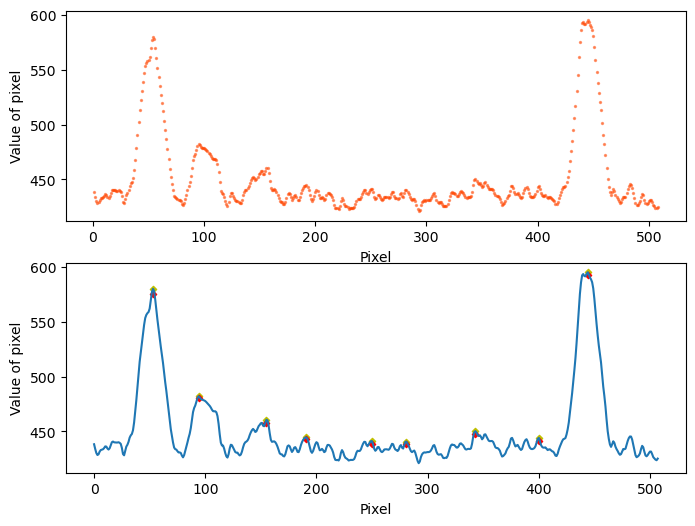

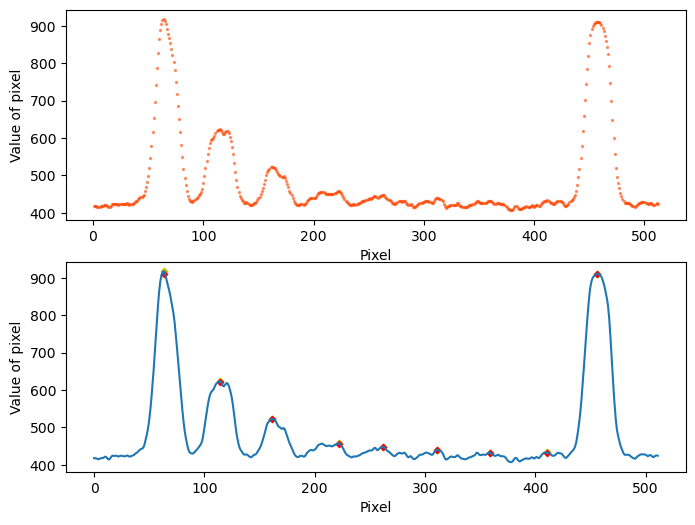

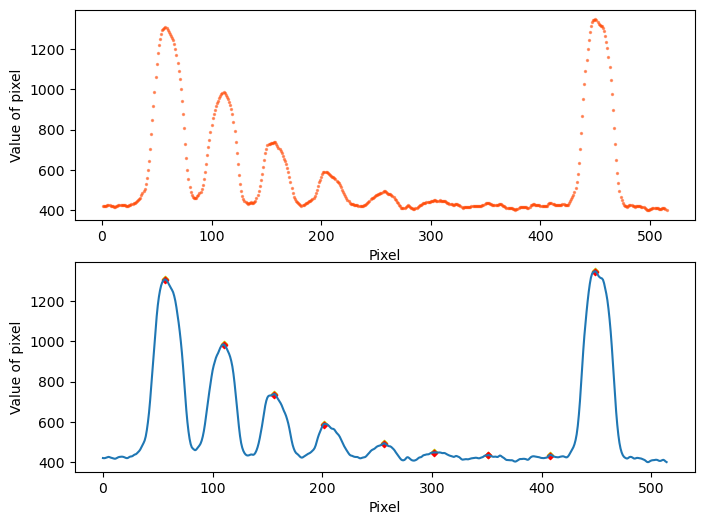

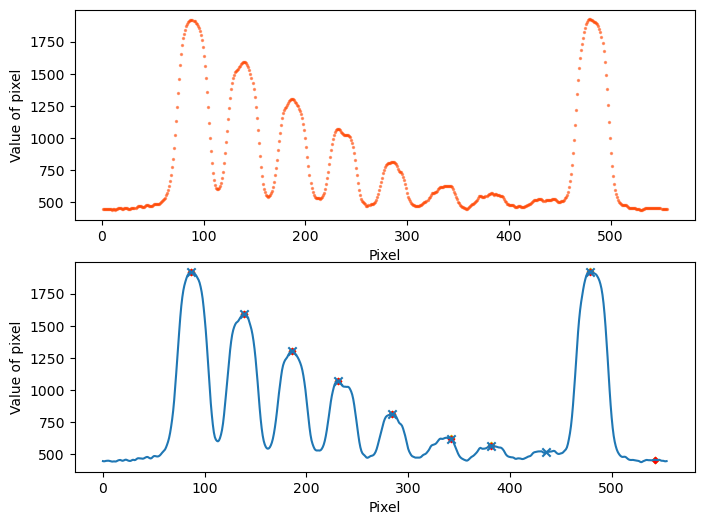

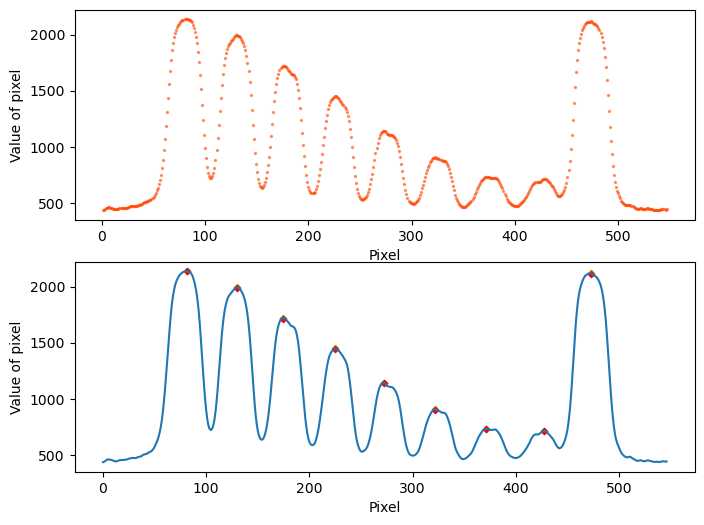

In [8]:
peaks_ind_1,peaks_mean_1 = reduct.graf(mean_cal_1,23)#

peaks_ind_2,peaks_mean_2 = reduct.graf(mean_cal_2,21)#

peaks_ind_3,peaks_mean_3 = reduct.graf(mean_cal_3,15)#

peaks_ind_4_,peaks_mean_4_ =reduct.graf(mean_cal_4,12)#[-1]
peaks_ind_4 = np.concatenate([peaks_ind_4_[:7],
                              [435],
                              [peaks_ind_4_[-2]]]) 
peaks_mean_4  = np.concatenate([peaks_mean_4_[:7],
                                [mean_cal_4[435]],
                                [peaks_mean_4_[-2]]])
# plt.plot(mean_cal_4)
plt.scatter(peaks_ind_4,peaks_mean_4, marker='x')

peaks_ind_5,peaks_mean_5 = reduct.graf(mean_cal_5,20)#

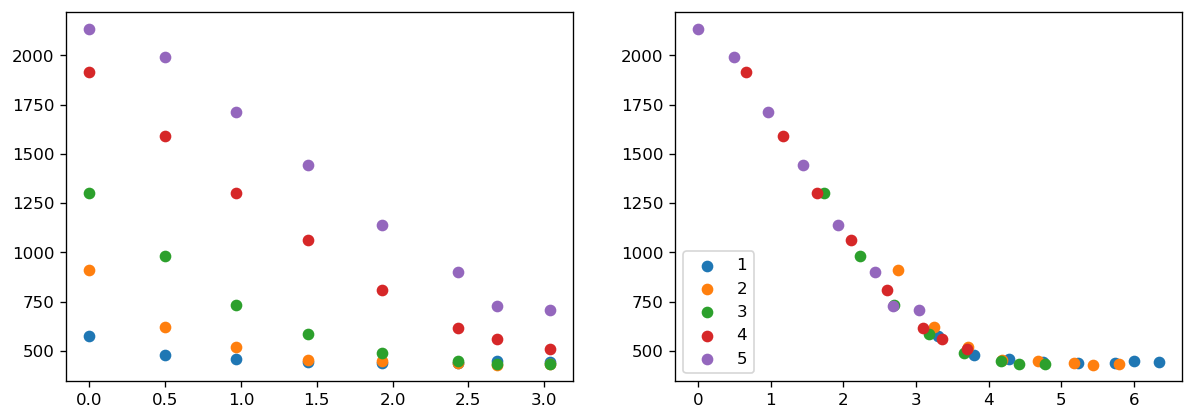

In [10]:
mag_TRP = [0.0, 0.20, 0.52, 0.87, 0.99, 1.72]
mag_before_1972 = [0,0.61,1.1,1.47,1.84,2.25,2.66,3.04,0]
mag_after_1972 = [0,0.5,0.97,1.44,1.93,2.43,2.69,3.04,0]
delta_m1 = 2.5*np.log(300/80)
delta_m2 = 2.5*np.log(300/100)
delta_m3 = 2.5*np.log(300/150)
delta_m4 = 2.5*np.log(300/230)
delta_m5 = 2.5*np.log(300/300)

fig = plt.figure(figsize=(12,4),dpi=120)
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(mag_after_1972[:-1],peaks_mean_1[:-1] , label=1)
ax1.scatter(mag_after_1972[:-1],peaks_mean_2[:-1] , label=2)
ax1.scatter(mag_after_1972[:-1],peaks_mean_3[:-1] , label=3)
ax1.scatter(mag_after_1972[:-1],peaks_mean_4[:-1] , label=4)
ax1.scatter(mag_after_1972[:-1],peaks_mean_5[:-1] , label=5)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(mag_after_1972[:-1]+delta_m1,peaks_mean_1[:-1], label=1)
ax2.scatter(mag_after_1972[:-1]+delta_m2,peaks_mean_2[:-1], label=2)
ax2.scatter(mag_after_1972[:-1]+delta_m3,peaks_mean_3[:-1], label=3)
ax2.scatter(mag_after_1972[:-1]+delta_m4,peaks_mean_4[:-1], label=4)
ax2.scatter(mag_after_1972[:-1]+delta_m5,peaks_mean_5[:-1], label=5)

plt.legend(loc=3)

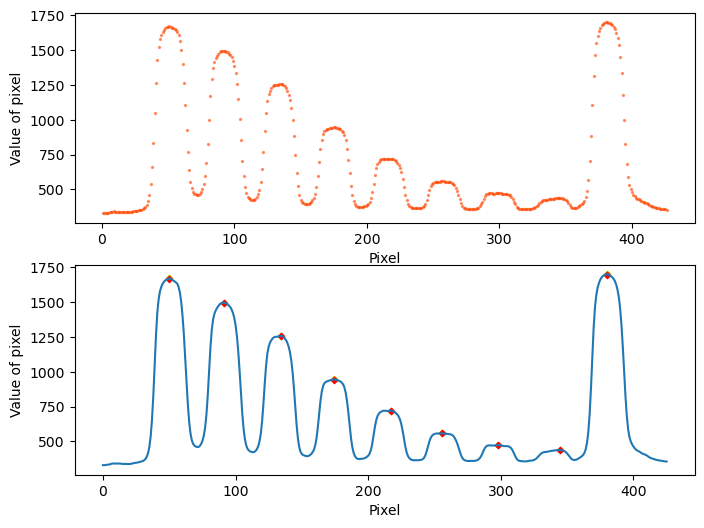

In [4]:
fits_cal_1  = fits.open('Calibrovka_04-05.02.1976_20s_XVI-6-Cal-crop-header.fits')
data_cal_1 = fits_cal_1[0].data
mean_cal_1 = reduct.calib_preob(data_cal_1)
peaks_ind_1,peaks_mean_1 = reduct.graf(mean_cal_1,15)#
delta_m1 = 2.5*np.log(80/80)
mag_after_1972 = [0,0.5,0.97,1.44,1.93,2.43,2.69,3.04,0]


array = [peaks_mean_1[:-1]]#]
y_array = np.concatenate(array)
x_array = np.concatenate([mag_after_1972[:-1]+delta_m1])#,
#                           mag_after_1972[:-1]+delta_m2,
#                           mag_after_1972[:-1]+delta_m3,
#                           mag_after_1972[:-1]+delta_m4,
#                           mag_after_1972[:-1]+delta_m5])

In [13]:
intensity, dark = 

SyntaxError: invalid syntax (770576653.py, line 1)

In [ ]:
reduct.mean_deviation(x_array,y_array)

check
Best degree: 3, MSE: 6.545777455164744e-21


/Users/adelumirbaeva/ArXSP/Pro.AP22784884/reduct.py:445: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/reduct.py:445: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/reduct.py:445: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/reduct.py:445: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/reduct.py:445: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/reduct.py:445: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/reduct.py:445: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva

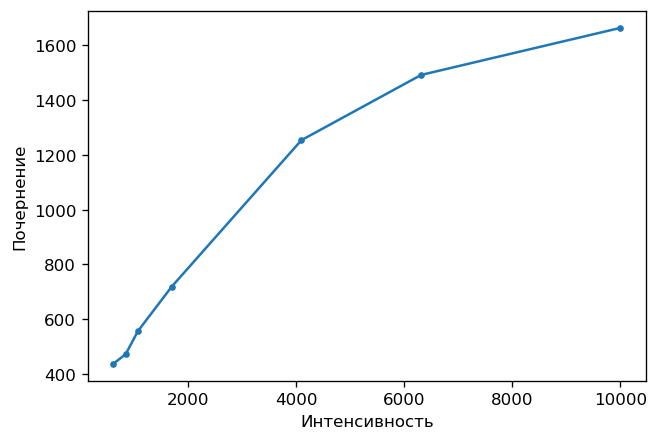

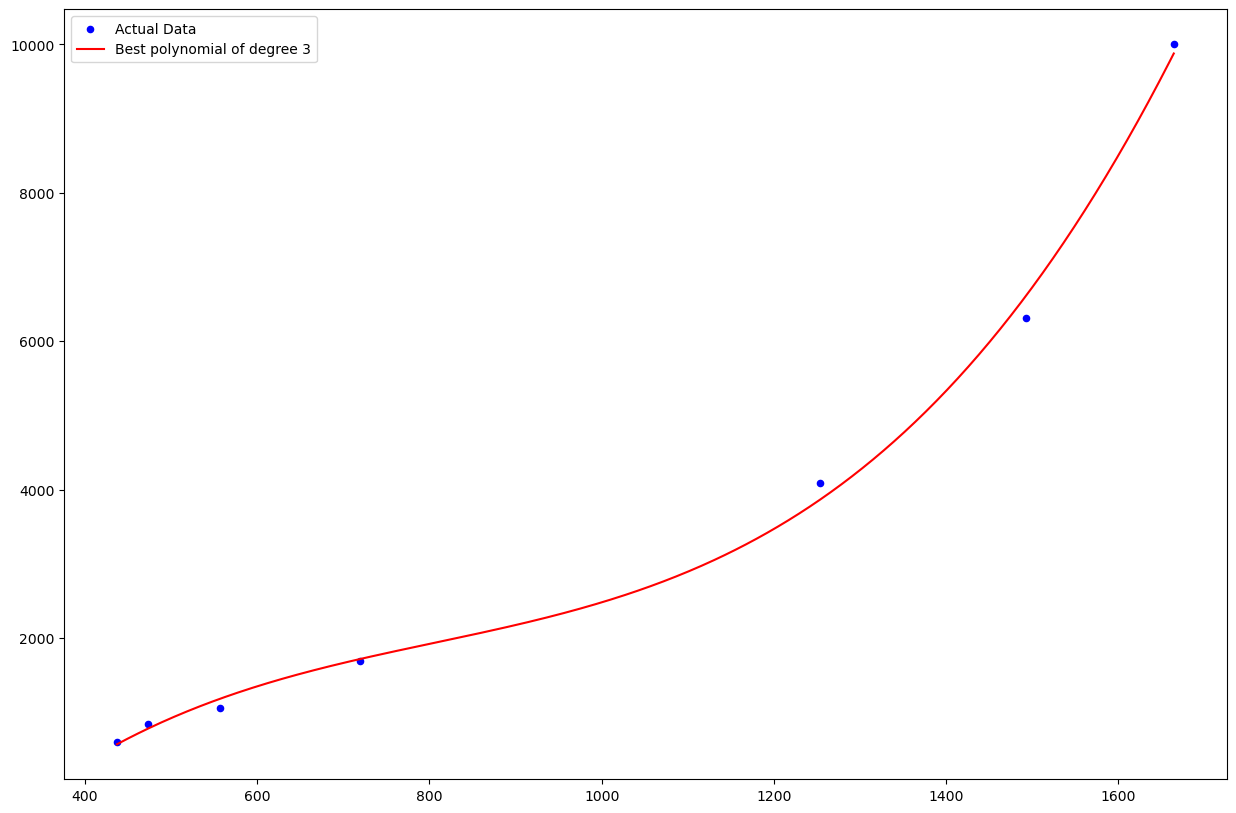

/opt/anaconda3/lib/python3.12/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


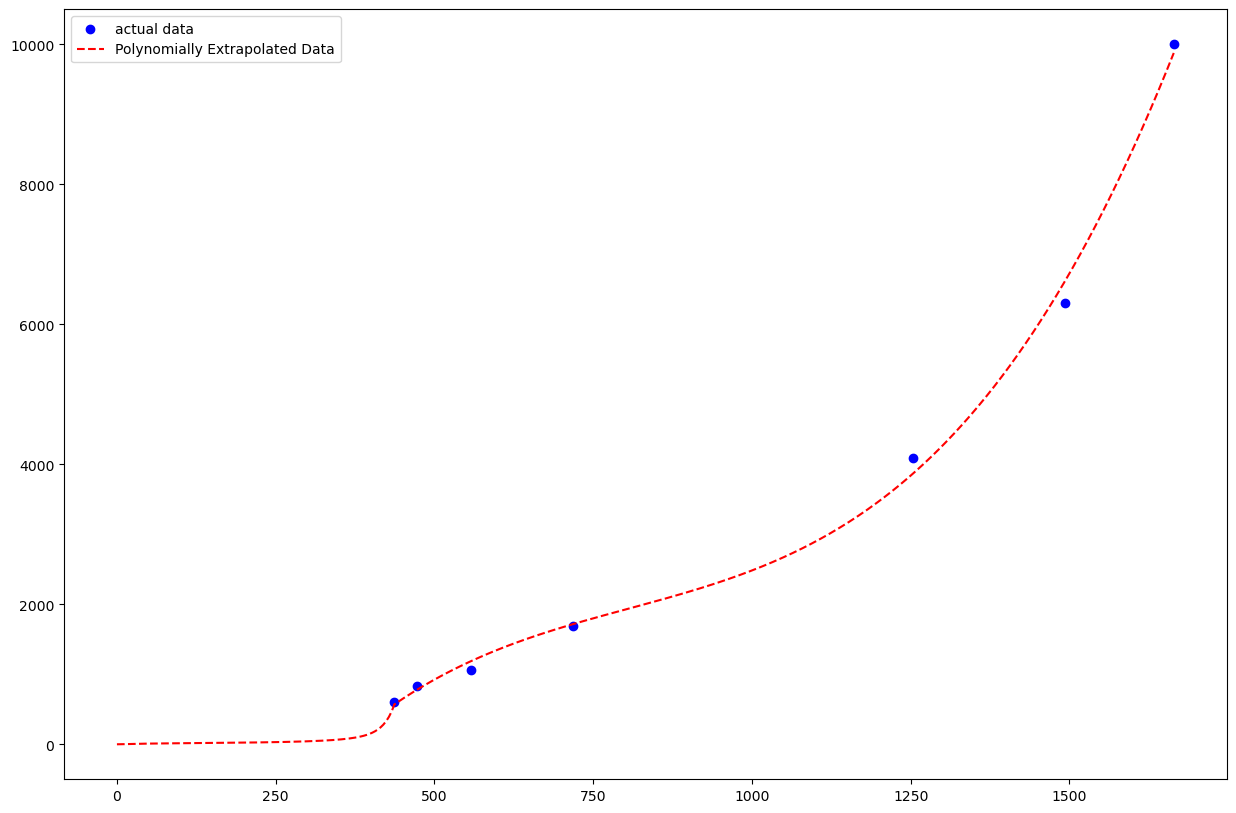

dark [ 437.04477244  472.58210946  556.88047205  718.78340504 1254.01926022
 1492.34593348 1664.25719415]
intensity [  608.13500128   839.45998652  1066.59612123  1690.44093164
  4092.6065973   6309.5734448  10000.        ]


In [6]:
intensity, dark = reduct.mean_deviation(x_array,y_array)
best_poly,polynomial_extrapolate,root = reduct.poly_mse_new(dark,intensity)
print("dark",dark)
print("intensity",intensity)


In [21]:
arx_data = ArxSR.ArxData(path)

plt.imshow(arx_data.get_data())

spec_editor = ArxSR.ArxSpectEditor(arx_data)
result = spec_editor.SDistorsionCorr(top=180, down=240, order_mse=3)



NameError: name 'path' is not defined

In [9]:
best_poly,polynomial_extrapolate,root = ArxSR.ArxCollibEditor.poly_mse_new(dark,intensity)

check x_sorted [ 437.61491299  472.58210946  557.00384304  719.3824592  1254.06941233
 1492.34593348 1664.25719415]
check y_sorted [  608.13500128   839.45998652  1066.59612123  1690.44093164
  4092.6065973   6309.5734448  10000.        ]
check poly_mse_new
poly  
6.568 x - 2675
diff [ 229.67748516  554.51318432 1066.56283511 3512.02175576 1565.08835921
 1129.17677157]
poly           2
0.007007 x - 7.834 x + 3078
diff [ -50.91433801  -52.29813102  180.21996311 3205.07529367 2718.86762585
 2455.71699868]
poly            3           2
9.205e-06 x - 0.02225 x + 20.38 x - 4858
diff [ 204.75803831  406.24248878  534.99233143 2151.27882752 2736.94885558
 3268.78774932]
poly            4             3          2
1.364e-08 x - 4.742e-05 x + 0.0598 x - 28.08 x + 4996
diff [  70.81905817  270.34136251  716.48721296 2309.73258408 2291.6251463
 3640.98357235]
poly            5             4             3           2
1.262e-11 x - 5.398e-08 x + 9.104e-05 x - 0.07444 x + 32.99 x - 5394
diff [ 145.52

/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/

AttributeError: 'int' object has no attribute 'coef'

In [ ]:
peak_x, peak_y = A

check x_sorted [ 437.04477244  472.58210946  556.88047205  718.78340504 1254.01926022
 1492.34593348 1664.25719415]
check y_sorted [  608.13500128   839.45998652  1066.59612123  1690.44093164
  4092.6065973   6309.5734448  10000.        ]
check poly_mse_new
poly  
6.567 x - 2672
diff [16.14935331 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331
 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331
 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331
 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331
 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331
 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331
 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331
 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331
 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331 16.14935331
 16.14935331 16.14935331 16.14935331 16.14935331 16.149353

/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/Pro.AP22784884/ArxSR.py:717: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y, degree)
/Users/adelumirbaeva/ArXSP/

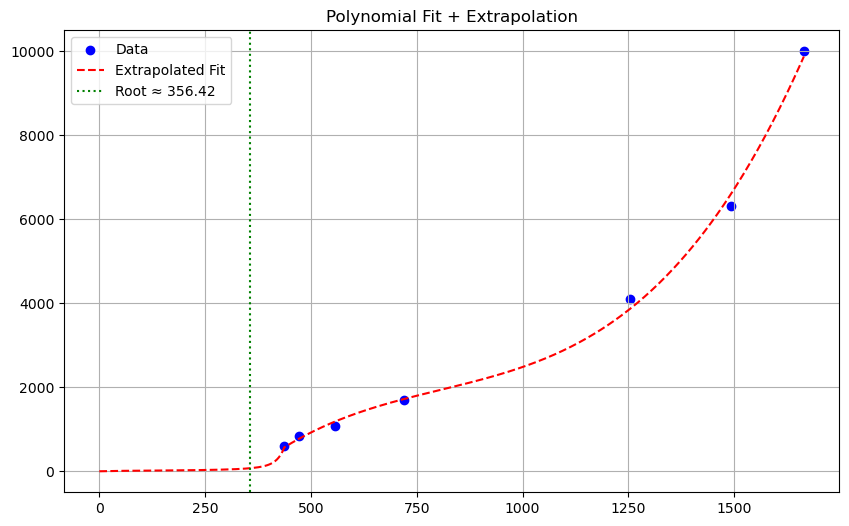

In [ ]:
best_poly, polynomial_extrapolate_c, root = ArxSR.ArxCollibEditor.poly_mse_new(dark, intensity)

if best_poly is not None:
    x_test =  np.linspace(min(dark), max(dark), 500)
    y_test = best_poly(x_test)

    x_extrapolate = np.linspace(0, x_test[0], 100)
    y_extrapolate = ArxSR.ArxCollibEditor.polynomial_extrapolate(polynomial_extrapolate_c,x_extrapolate)

    x_full = np.concatenate([x_extrapolate, x_test])
    y_full = np.concatenate([y_extrapolate, y_test])

    plt.figure(figsize=(10, 6))
    plt.scatter(dark, intensity, color='blue', label='Data')
    plt.plot(x_full, y_full, 'r--', label='Extrapolated Fit')
    plt.axvline(root, color='green', linestyle=':', label=f'Root ≈ {root:.2f}')
    plt.legend()
    plt.grid(True)
    plt.title("Polynomial Fit + Extrapolation")
    plt.show()

In [ ]:
# best_poly и polynomial_extrapolate — это функции, которые ты сам определяешь

result = spec_editor.OptDen2Int(
    root=root,
    best_poly=best_poly,
    polynomial_extrapolate=extra_poly
)

Root difference: 0.219064
Difference in polynomial coefficients: 3.714528e+01
Difference in extrapolated values: 2.575678e-01


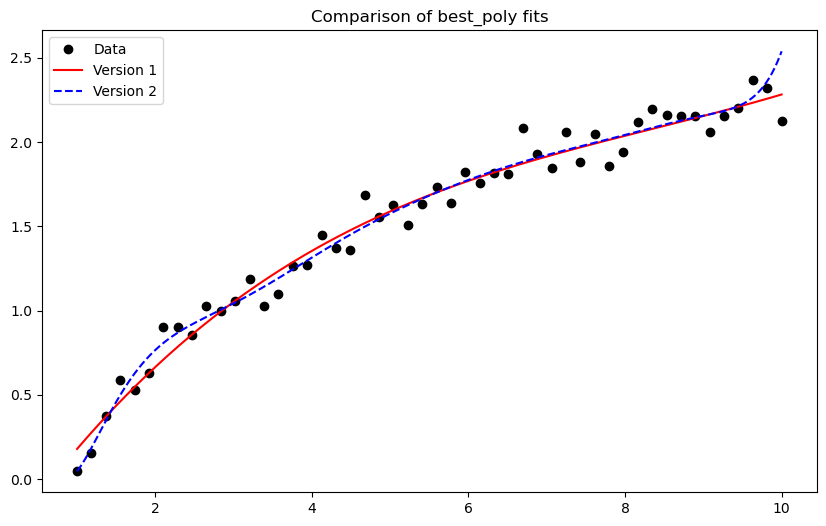

In [49]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


# ===== Тестовые данные =====
np.random.seed(42)
x = np.linspace(1, 10, 50)
y = np.log(x) + np.random.normal(0, 0.1, size=len(x))


# ======= ВЕРСИЯ 1 (вне класса) =======
def version1_poly_mse_new(x, y):
    MAX_DEGREE = 15
    candidates = [] 
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]
    
    def is_strictly_monotonic(y_vals):
        diff = np.diff(y_vals)
        return np.all(diff > 0) or np.all(diff < 0)

    def is_smooth(poly, x):
        derivative = poly.deriv()
        return np.std(derivative(x))

    def get_poly_mse(x, y, degree):
        coeffs = np.polyfit(x, y, degree)
        poly = np.poly1d(coeffs)
        mse = ((y - poly(x)) ** 2).mean()
        return mse, poly

    for deg in range(1, MAX_DEGREE+1):
        mse, poly = get_poly_mse(x_sorted, y_sorted, deg)
        y_pred = poly(x_sorted)
        if is_strictly_monotonic(y_pred):
            candidates.append((deg, poly, is_smooth(poly, x_sorted)))

    if not candidates:
        return None, None, None

    _, best_poly, _ = sorted(candidates, key=lambda x: x[2])[len(candidates) // 2]

    x_test = np.linspace(min(x_sorted), max(x_sorted), 500)
    root = fsolve(lambda x: sum(c * x**i for i, c in enumerate(best_poly.coeffs[::-1])), 1)[0]

    x_points = [0, x_test[0]]
    y_points = [0, best_poly(x_test)[0]]
    extrapolation_poly = Polynomial.fit(x_points, y_points, 20).convert()

    def polynomial_extrapolate(x):
        return extrapolation_poly(x)

    return best_poly, polynomial_extrapolate, root


# ======= ВЕРСИЯ 2 (классовая) =======
def version2_poly_mse_new(x, y):
    MAX_DEGREE = 15
    candidates = [] 
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices][:-1]
    y_sorted = y[sorted_indices][:-1]

    def is_strictly_monotonic(y_vals):
        return np.all(np.diff(y_vals) > 0) or np.all(np.diff(y_vals) < 0)

    def is_smooth(poly, x):
        derivative = np.polyder(poly)
        return np.std(derivative(x))

    def get_poly_mse(x, y, degree):
        coeffs = np.polyfit(x, y, degree)
        poly = np.poly1d(coeffs)
        mse = ((y - poly(x)) ** 2).mean()
        return mse, poly

    for deg in range(1, MAX_DEGREE+1):
        try:
            mse, poly = get_poly_mse(x_sorted, y_sorted, deg)
            if is_strictly_monotonic(poly(x_sorted)):
                candidates.append((deg, poly, is_smooth(poly, x_sorted)))
        except Exception:
            continue

    if not candidates:
        return None, None, None

    _, best_poly, _ = sorted(candidates, key=lambda x: x[2])[len(candidates) // 2]

    x_test = np.linspace(min(x_sorted), max(x_sorted), 500)
    root = fsolve(lambda x: sum(c * x**i for i, c in enumerate(best_poly.coeffs[::-1])), 1)[0]

    x_points = [0, x_test[0]]
    y_points = [0, best_poly(x_test)[0]]
    extrapolation_poly = Polynomial.fit(x_points, y_points, 20).convert()

    return best_poly, extrapolation_poly.coef, root


# ========== ЗАПУСК СРАВНЕНИЯ ==========
poly1, extrap1, root1 = version1_poly_mse_new(x, y)
poly2, extrap2, root2 = version2_poly_mse_new(x, y)

print(f"Root difference: {abs(root1 - root2):.6f}")

# Сравнение коэффициентов
def pad_to_same_length(a, b):
    len_a, len_b = len(a), len(b)
    if len_a < len_b:
        a = np.pad(a, (0, len_b - len_a))
    elif len_b < len_a:
        b = np.pad(b, (0, len_a - len_b))
    return a, b

coeffs1, coeffs2 = pad_to_same_length(poly1.coeffs, poly2.coeffs)
diff_coef = np.linalg.norm(coeffs1 - coeffs2)
print(f"Difference in polynomial coefficients: {diff_coef:.6e}")

# Сравнение экстраполяции
x_ex = np.linspace(0, x.min(), 100)
y1_ex = extrap1(x_ex)
y2_ex = sum(c * x_ex**i for i, c in enumerate(extrap2))
diff_extrap = np.linalg.norm(y1_ex - y2_ex)
print(f"Difference in extrapolated values: {diff_extrap:.6e}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ko', label='Data')
x_plot = np.linspace(min(x), max(x), 500)
plt.plot(x_plot, poly1(x_plot), 'r-', label='Version 1')
plt.plot(x_plot, poly2(x_plot), 'b--', label='Version 2')
plt.legend()
plt.title('Comparison of best_poly fits')
plt.show()


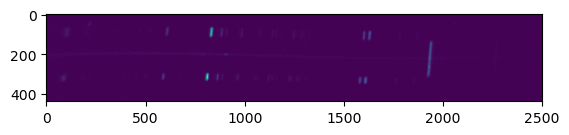

In [22]:
plt.imshow(result)